In [5]:
import numpy as np
import matplotlib.pyplot as plt  # Optional for visualization
from scipy.stats import norm

In [6]:
# Parameters for the Gaussian components
means = np.array([-3, 8])
std_devs = np.array([3, 1.75])

# Mixture weights
weights = [0.6, 0.4]

In [7]:
# Number of samples to generate
num_samples = 50

# Setting the random seed to ensure reproducibility
np.random.seed(123)

# Randomly choose components based on mixture weights
component_choices = np.random.choice([0, 1], size=num_samples, p=[weights[0], weights[1]])

# Initialize an array to store the generated samples
samples = np.zeros(num_samples)

# Generate samples from each component
for i in range(num_samples):
    if component_choices[i] == 0:
        samples[i] = np.random.normal(means[0], std_devs[0])
    else:
        samples[i] = np.random.normal(means[1], std_devs[1])

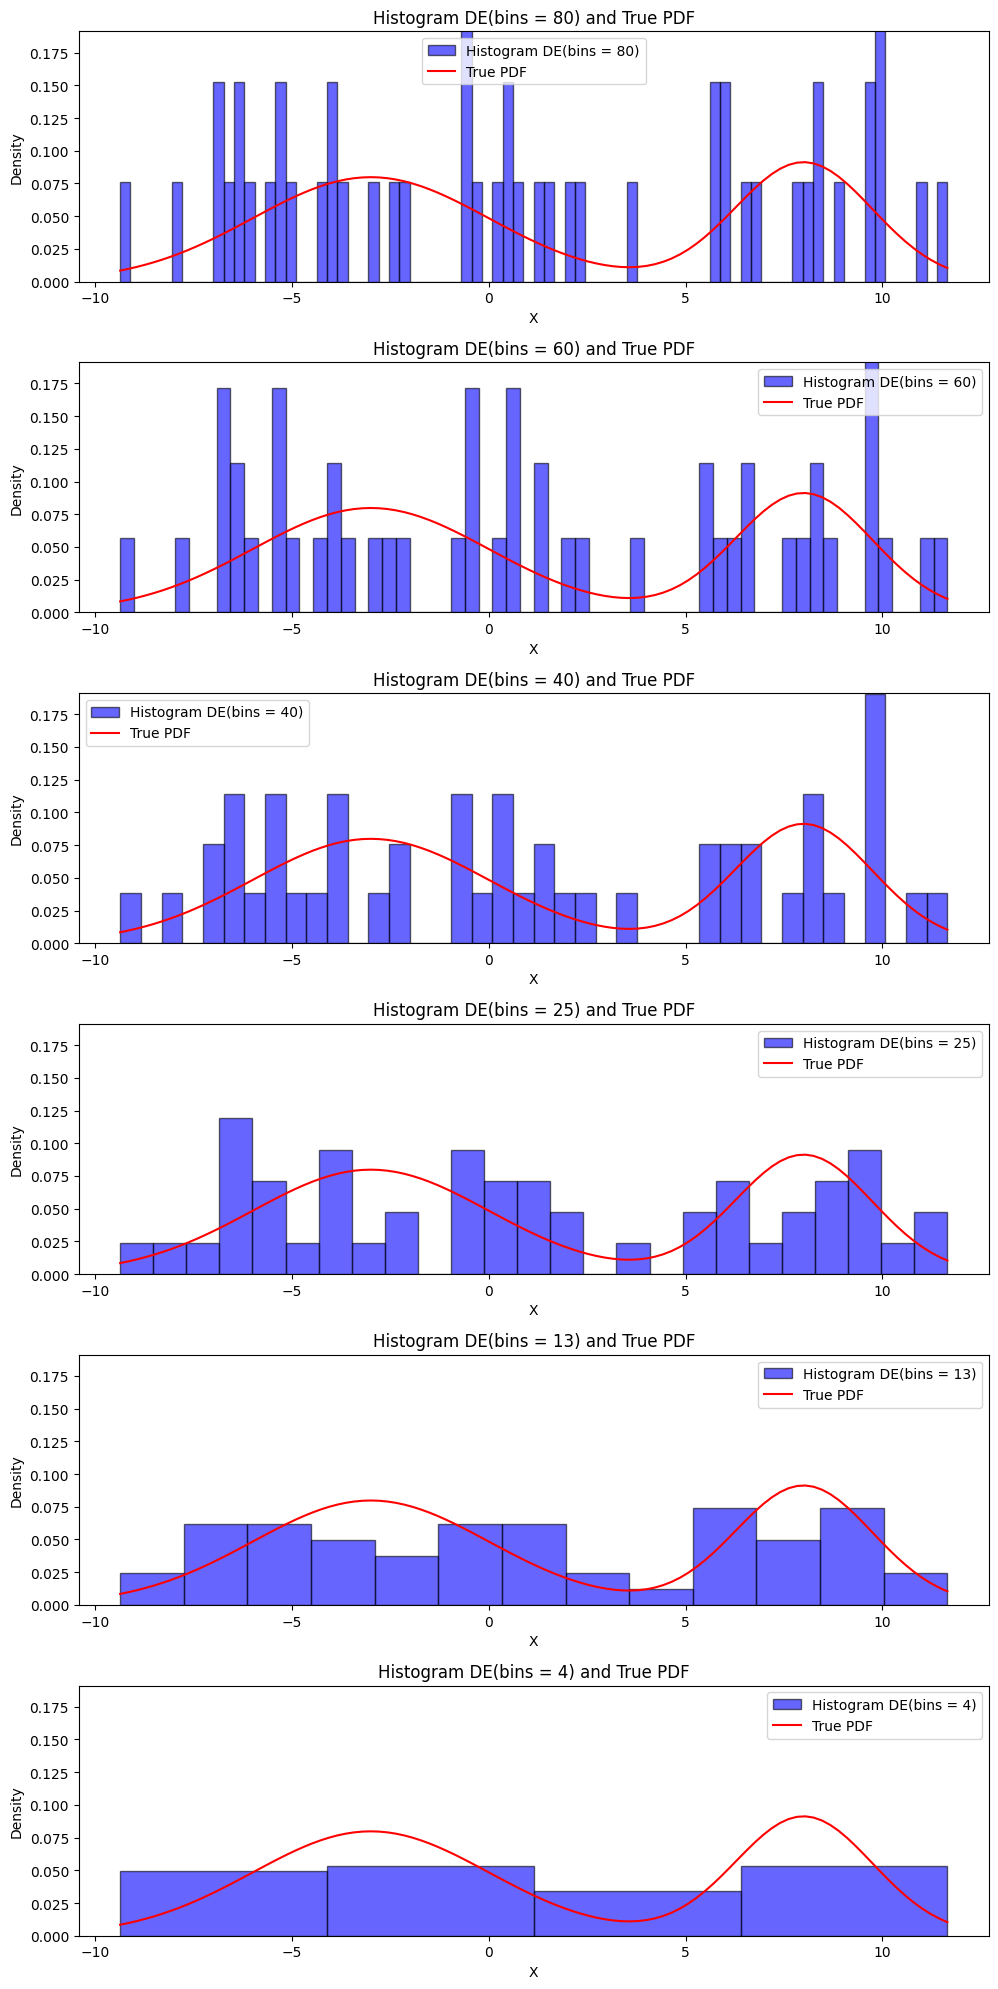

In [8]:
# List of bin counts for histograms
bins_list = [80, 60, 40, 25, 13, 4]

# Create a figure to hold the plots
plt.figure(figsize=(10, 20))

# Loop through each number of bins in the bins_list
for i, num_bins in enumerate(bins_list):
    
    plt.subplot(len(bins_list), 1, i + 1)  # Create subplots for each histogram

    # Plot the histogram with edgecolor and alpha
    plt.hist(samples, bins=num_bins, density=True, alpha=0.6, color='b', edgecolor='black', label='Histogram DE(bins = {})'.format(num_bins))

    # Plot the PDF of the Gaussian mixture distribution
    x = np.linspace(min(samples), max(samples), 100)  # Adjusted x range for better visualization
    pdf = weights[0] * norm.pdf(x, means[0], std_devs[0]) + weights[1] * norm.pdf(x, means[1], std_devs[1])
    plt.plot(x, pdf, 'r', label='True PDF')

    plt.xlabel('X')
    plt.ylabel('Density')
    plt.title('Histogram DE(bins = {}) and True PDF'.format(num_bins))
    plt.legend()
    plt.ylim(0.0, max(pdf) + 0.1)

# Adjust layout and display the figure with all subplots
plt.tight_layout()
plt.show()